In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/NBA_2024_cleaned.csv')

In [3]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,24,TOR,6,0,20.0,3.2,7.3,0.432,...,1.000,2.0,4.2,6.2,1.7,0.2,0.5,1.5,2.2,7.5
1,Bam Adebayo,C,26,MIA,10,10,34.7,8.4,16.0,0.525,...,0.803,2.3,8.2,10.5,3.8,1.4,1.4,2.9,2.3,23.0
2,Ochai Agbaji,SG,23,UTA,11,3,17.2,1.7,4.4,0.396,...,0.500,0.8,1.9,2.7,1.0,0.4,0.6,0.6,1.3,4.5
3,Santi Aldama,PF,23,MEM,5,0,21.0,4.6,9.6,0.479,...,0.444,0.6,4.0,4.6,1.8,0.4,0.8,1.6,1.2,11.6
4,Nickeil Alexander-Walker,SG,25,MIN,11,2,19.9,1.9,4.8,0.396,...,0.333,0.1,1.7,1.8,2.4,0.8,0.8,0.9,1.5,5.0


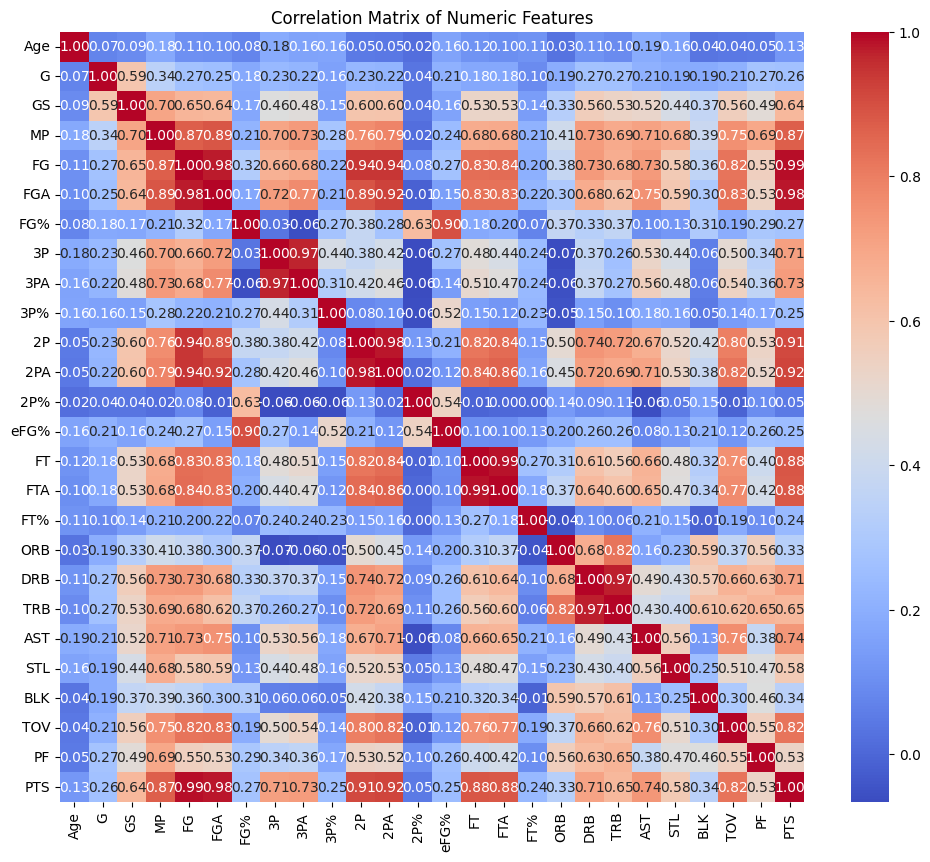

In [4]:
numeric_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [5]:
correlation_with_pts = correlation_matrix['PTS'].drop('PTS')
top_5_positive_correlations = correlation_with_pts.nlargest(5)
print("Top 5 positive correlations with PTS:", top_5_positive_correlations)


Top 5 positive correlations with PTS: FG     0.989895
FGA    0.980876
2PA    0.919509
2P     0.909077
FT     0.884021
Name: PTS, dtype: float64


In [6]:
# Define high scorers
high_scorers = df[df['PTS'] >= 20]
other_players = df[df['PTS'] < 20]

# Metrics
metrics = ['FGA', '3PA', 'FT', 'AST', 'TRB']

mean_values_high_scorers = high_scorers[metrics].mean()
mean_values_other_players = other_players[metrics].mean()

In [7]:
comparison_df = pd.DataFrame({
    'High Scorers': mean_values_high_scorers,
    'Other Players': mean_values_other_players
})

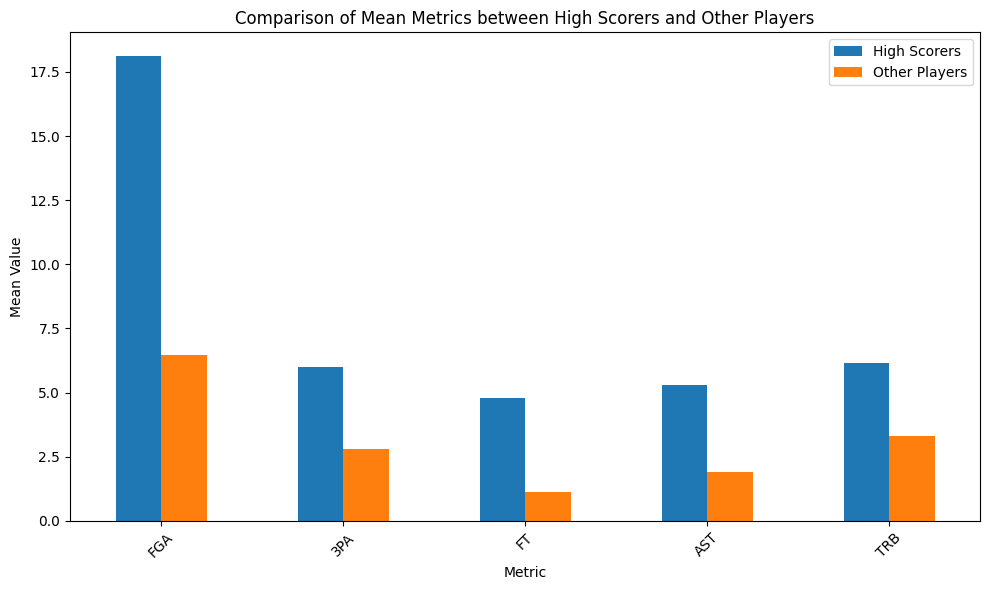

In [8]:
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Mean Metrics between High Scorers and Other Players')
plt.ylabel('Mean Value')
plt.xlabel('Metric')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()